<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# TS3: Simulación de un ADC (cuantización) parte 1/2
#### Pablo Romero


# Introducción
En el presente trabajo se cuantizó una señal senoidal, se calculó el error entre la señal cuantizada y la señal original.
Y luedo se paso a hacer comparaciones graficas y algunos cálculos estadisticos para corroborar lo visto en la teoria.




In [1]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

import matplotlib.pyplot as plt
import scipy.signal as sig


#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

##############################################
#%% A partir de aquí comienza lo IMPORTANTE #
#############################################
 
vmax=1          #Amplitud Maxima [Volts]
dc=0            #Valor de continua [Volts]

ph=np.pi*1   #Fase [rad]
nn=1000  #Muestras del ADC
fs=1000 #Frecuencia de muestreio del ADC [Hz]
ff=fs/nn #Frecuencia en [Hz][]         
Ts=1/fs
delta_f=fs/nn
B_bits=4
vf=2


def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):

    tt = np.arange(0.0, nn/fs, 1/fs)
    aux = tt * 2*np.pi*ff

    xx = (np.sin(2*np.pi*ff*tt+ph))*vmax + dc

    return tt,xx


def Cuantizar (xx, vf, bits):   #Revisar hay algo mal
    
    nn=np.size(xx)
    x = np.zeros(nn)
    delta_q= 2*vf/(2**bits-1)
    lim_pos = delta_q*((2**(bits-1)-1))
    lim_neg = -lim_pos
    
    for n in range(nn):
           
        x[n]=xx[n]/delta_q
        x[n]=np.round(x[n])
        x[n]=x[n]*delta_q
        if x[n] >= lim_pos:
            x[n]=lim_pos
        elif x[n] <= lim_neg:
            x[n]=lim_neg
            
         
    return x, delta_q




        

Cuantizamos la funcion Sen() y calculoamos el error entre el Sen() y el Sen() cuantizado.

In [2]:
q=2*vf/(2**B_bits-1)
noise = np.random.uniform(-q/2,q/2, size=nn)

Signal0 = mi_funcion_sen(vmax, dc, ff, ph*0, nn, fs)
xx = Signal0[1]
xx+=noise

xx_q_b4, q_b4= Cuantizar(xx, vf, 4) #Devuelve señal cuantizada y el q
error_b4=xx_q_b4-xx

xx_q_b8, q_b8= Cuantizar(xx, vf, 8) #Devuelve señal cuantizada y el q
error_b8=xx_q_b8-xx

xx_q_b16, q_b16= Cuantizar(xx, vf, 16) #Devuelve señal cuantizada y el q
error_b16=xx_q_b16-xx

Se calcula la media, la variancia y se hace la autocorrelacion del error

In [3]:
error_mean_b4 = np.mean(error_b4) #Media
error_var_b4 = np.var(error_b4) #Varianza
error_ac_b4 = sig.correlate( error_b4, error_b4) #Autocorrelacion

error_mean_b8 = np.mean(error_b8) #Media
error_var_b8 = np.var(error_b8) #Varianza
error_ac_b8 = sig.correlate( error_b8, error_b8) #Autocorrelacion

error_mean_b16 = np.mean(error_b16) #Media
error_var_b16 = np.var(error_b16) #Varianza
error_ac_b16 = sig.correlate( error_b16, error_b16) #Autocorrelacion


Cuantizacion para ADC de 4 bits, 8 bits y 16 bits.

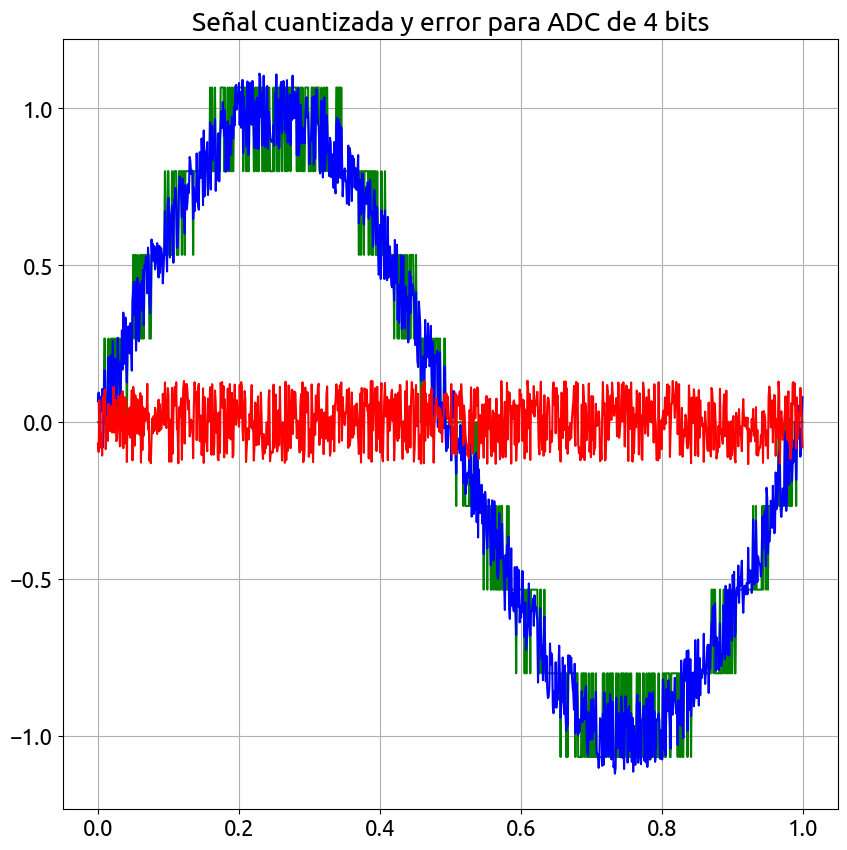

In [4]:
plt.figure(1)
plt.clf()
plt.title('Señal cuantizada y error para ADC de 4 bits')
plt.plot(Signal0[0],xx_q_b4, 'g-')
plt.plot(Signal0[0],xx, 'b-')
plt.plot(Signal0[0],error_b4, 'r-')
plt.axis('tight')
plt.grid(which='both', axis='both')
plt.show()

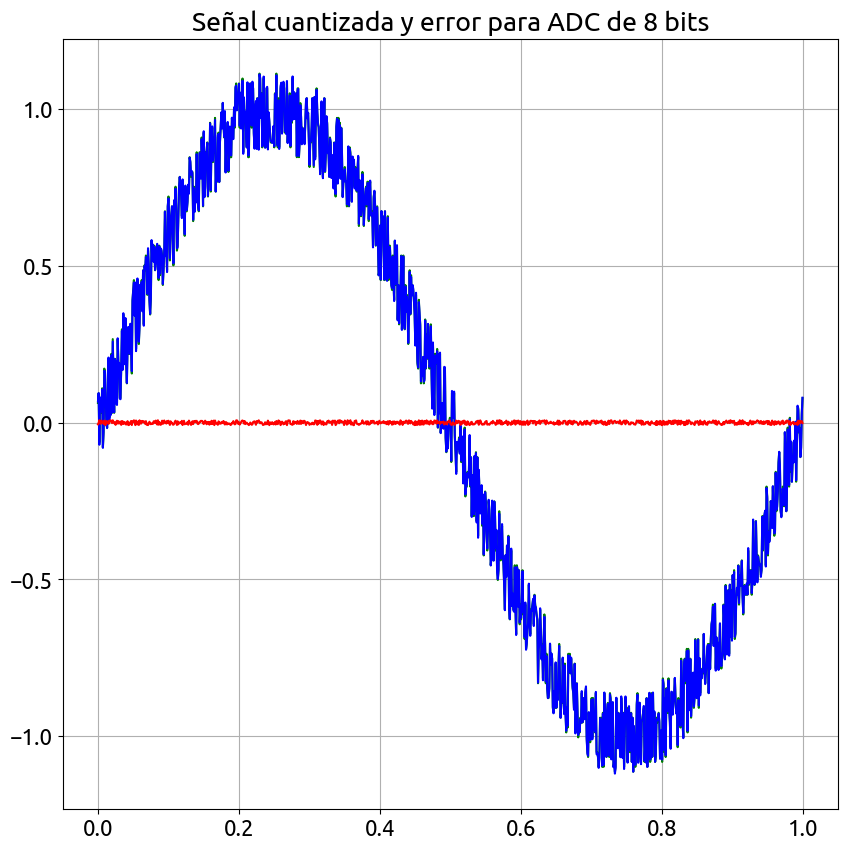

In [5]:
plt.figure(2)
plt.clf()
plt.title('Señal cuantizada y error para ADC de 8 bits')
plt.plot(Signal0[0],xx_q_b8, 'g-')
plt.plot(Signal0[0],xx, 'b-')
plt.plot(Signal0[0],error_b8, 'r-')
plt.axis('tight')
plt.grid(which='both', axis='both')
plt.show()

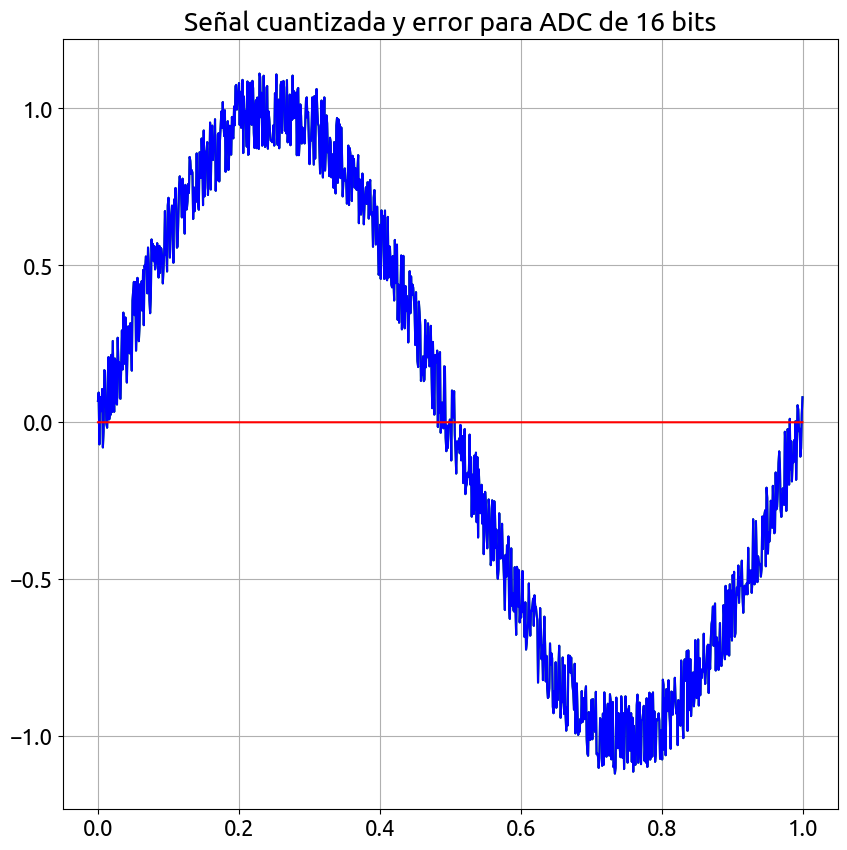

In [6]:
plt.figure(3)
plt.clf()
plt.title('Señal cuantizada y error para ADC de 16 bits')
plt.plot(Signal0[0],xx_q_b16, 'g-')
plt.plot(Signal0[0],xx, 'b-')
plt.plot(Signal0[0],error_b16, 'r-')
plt.axis('tight')
plt.grid(which='both', axis='both')
plt.show()

Media y Varianza para 4 bits

In [7]:
print('Media teorica: 0                     Estimación de la media: {:g}'.format(error_mean_b4) )
print('Varianza teorica: {:g}         Estimación de la varianza: {:g}'.format(q_b4**2/12, error_var_b4) )

Media teorica: 0                     Estimación de la media: 0.0053339
Varianza teorica: 0.00592593         Estimación de la varianza: 0.00575096


Media y varianza para 8 bits

In [8]:
print('Media teorica: 0                     Estimación de la media: {:g}'.format(error_mean_b8) )
print('Varianza teorica: {:g}        Estimación de la varianza: {:g}'.format(q_b8**2/12, error_var_b8) )

Media teorica: 0                     Estimación de la media: 9.46881e-05
Varianza teorica: 2.05049e-05        Estimación de la varianza: 2.09964e-05


Media y varianza para 16 bits

In [9]:
print('Media teorica: 0                     Estimación de la media: {:g}'.format(error_mean_b16) )
print('Varianza teorica: {:g}         Estimación de la varianza: {:g}'.format(q_b16**2/12, error_var_b16) )

Media teorica: 0                     Estimación de la media: -1.50475e-06
Varianza teorica: 3.1045e-10         Estimación de la varianza: 2.95124e-10


## Con la representacion del histograma se trata de mostrar la distrubucion del error, que tiende a hacerce rectangular a medida que subimos el numero de bits.

Text(0.5, 1.0, 'Ruido de cuantización para 4 bits - V_R=2.0 V - q = 0.267 V')

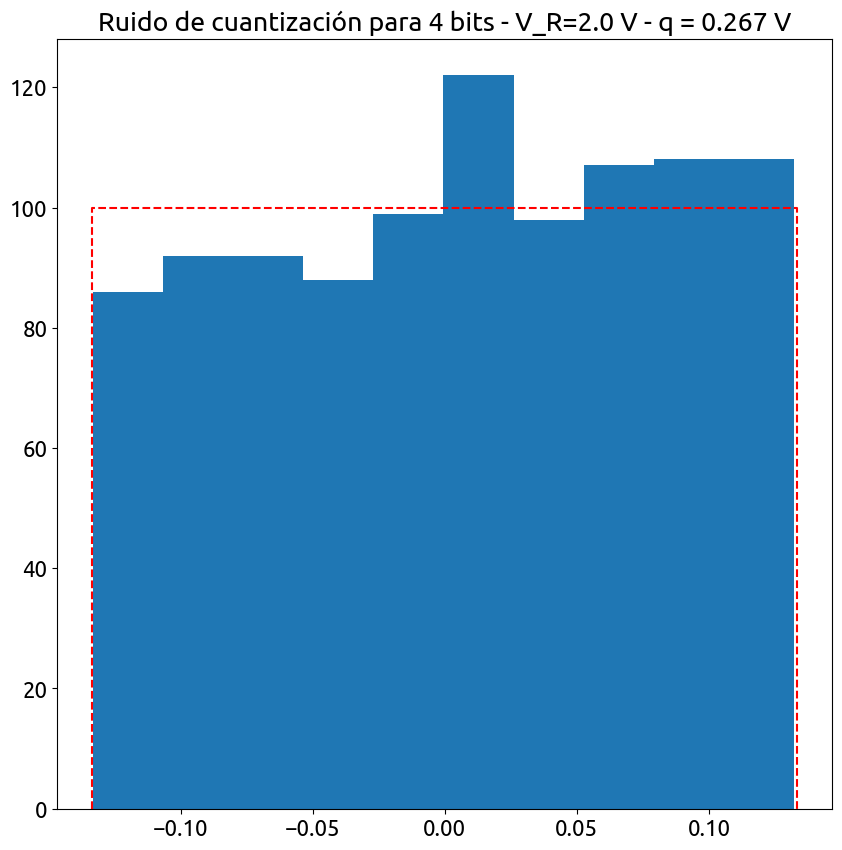

In [10]:
plt.figure(4)
bins = 10
plt.hist(error_b4, bins=bins)
plt.plot( np.array([-q_b4/2, -q_b4/2, q_b4/2, q_b4/2]), np.array([0, nn/bins, nn/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - V_R={:3.1f} V - q = {:3.3f} V'.format(4, vf, q_b4))

Text(0.5, 1.0, 'Ruido de cuantización para 8 bits - V_R=2.0 V - q = 0.016 V')

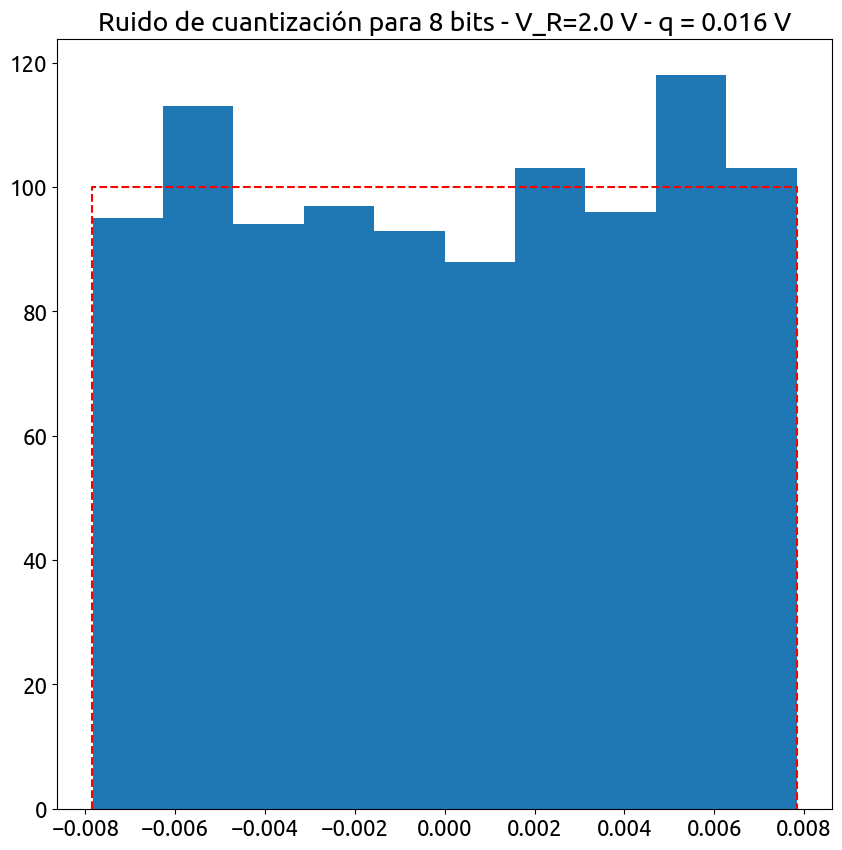

In [11]:
plt.figure(5)
bins = 10
plt.hist(error_b8, bins=bins)
plt.plot( np.array([-q_b8/2, -q_b8/2, q_b8/2, q_b8/2]), np.array([0, nn/bins, nn/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - V_R={:3.1f} V - q = {:3.3f} V'.format(8, vf, q_b8))

Text(0.5, 1.0, 'Ruido de cuantización para 16 bits - V_R=2.0 V - q = 0.000061 V')

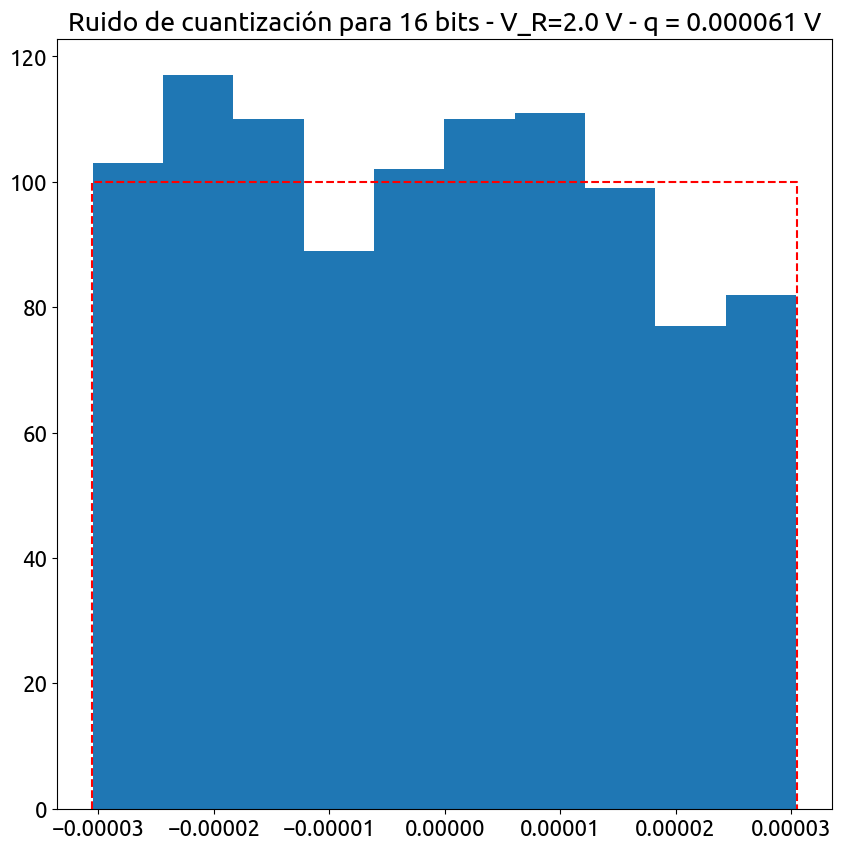

In [12]:
plt.figure(6)
bins = 10
plt.hist(error_b16, bins=bins)
plt.plot( np.array([-q_b16/2, -q_b16/2, q_b16/2, q_b16/2]), np.array([0, nn/bins, nn/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - V_R={:3.1f} V - q = {:.6f} V'.format(16, vf, q_b16))

## Aqui se muestra la autocorrelacion del error para los distintos casos, hay dos picos negativos, que por lo que vimos en la teoria no deberian estar. No tengo claro porque todavia.

Text(0.5, 0, 'Demora [#]')

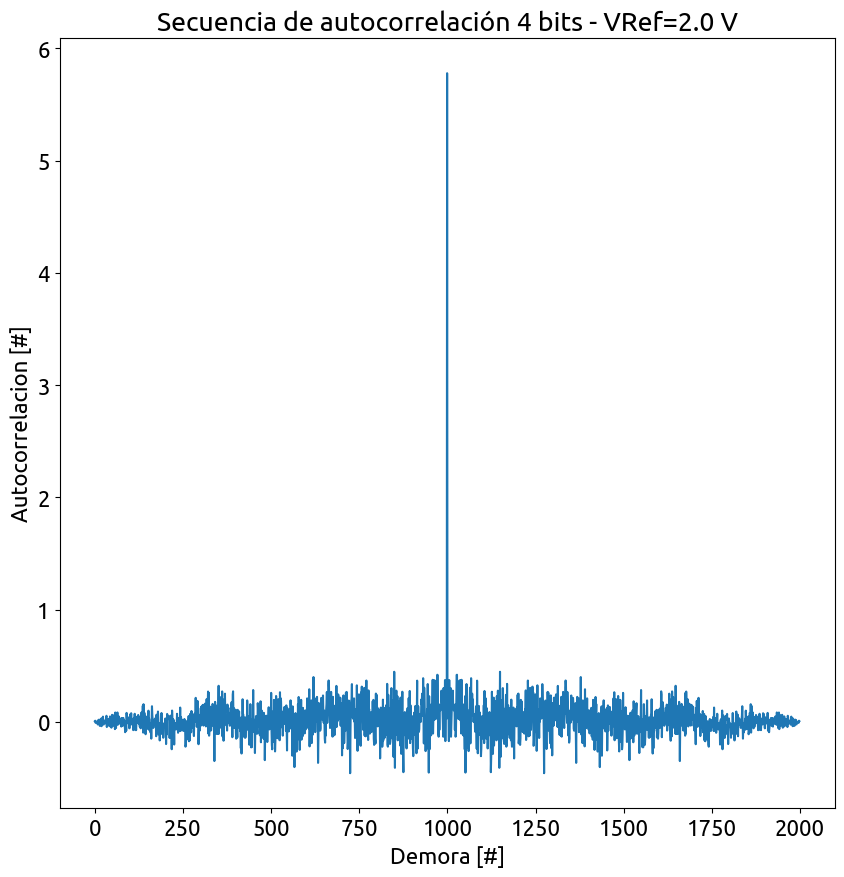

In [13]:
plt.figure(7)
plt.plot(error_ac_b4)
plt.title( 'Secuencia de autocorrelación {:d} bits - VRef={:3.1f} V'.format(4,vf))
plt.ylabel('Autocorrelacion [#]')
plt.xlabel('Demora [#]')

Text(0.5, 0, 'Demora [#]')

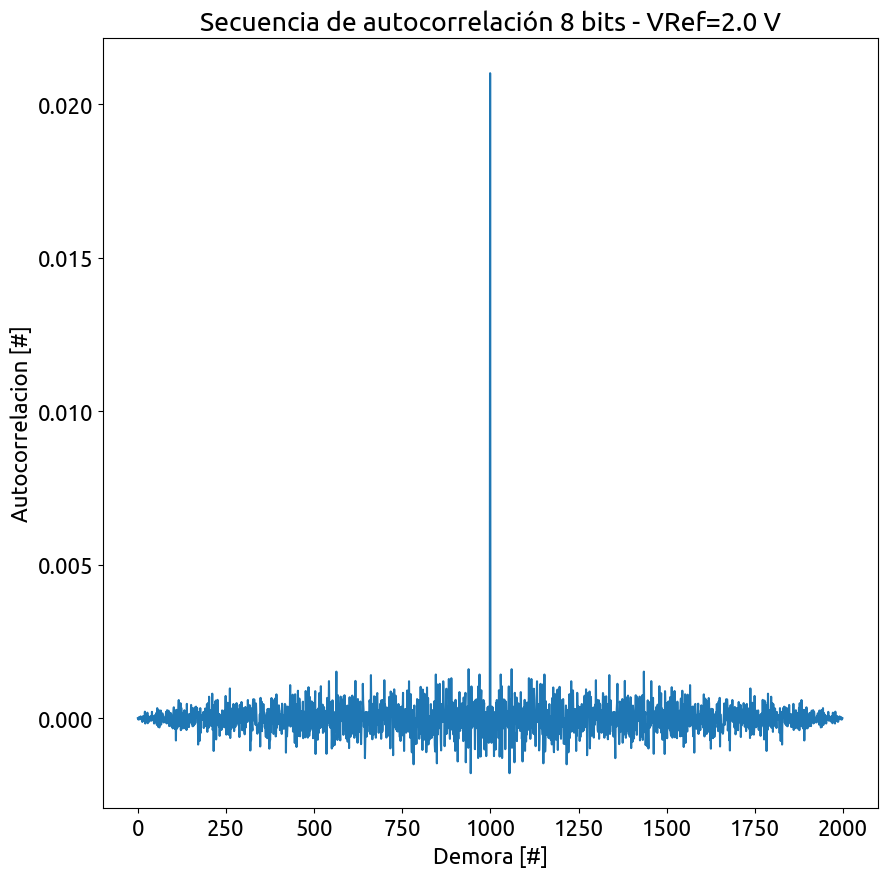

In [14]:
plt.figure(8)
plt.plot(error_ac_b8)
plt.title( 'Secuencia de autocorrelación {:d} bits - VRef={:3.1f} V'.format(8,vf))
plt.ylabel('Autocorrelacion [#]')
plt.xlabel('Demora [#]')

Text(0.5, 0, 'Demora [#]')

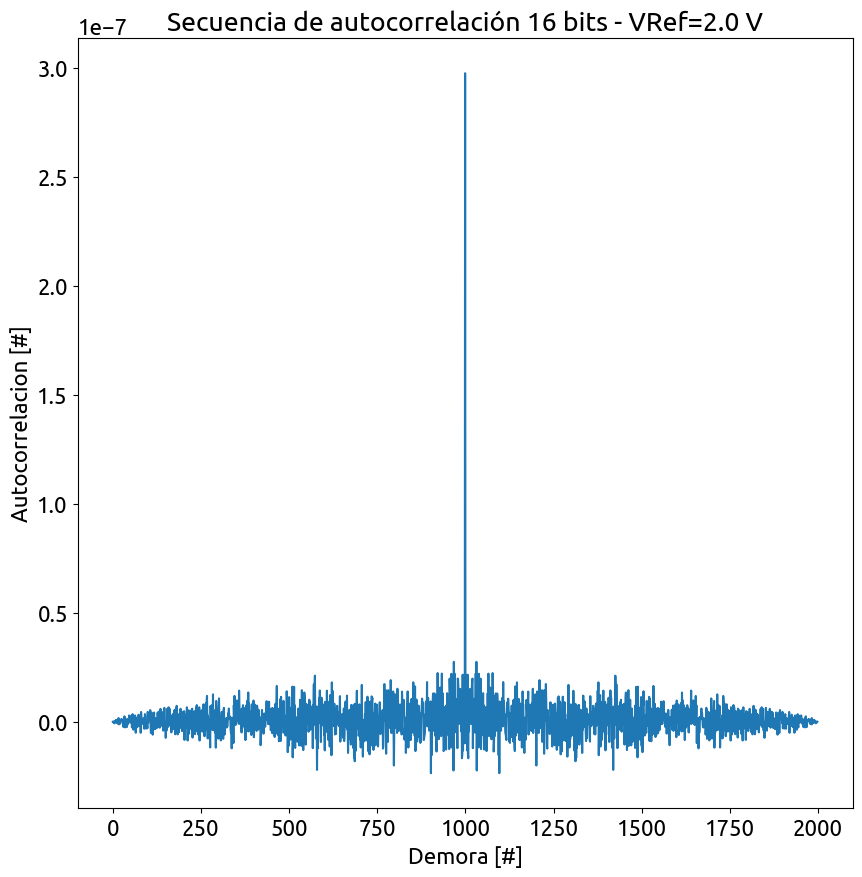

In [15]:
plt.figure(9)
plt.plot(error_ac_b16)
plt.title( 'Secuencia de autocorrelación {:d} bits - VRef={:3.1f} V'.format(16,vf))
plt.ylabel('Autocorrelacion [#]')
plt.xlabel('Demora [#]')



Fin del documento